In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import csv

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
math = pd.read_csv(
    '/content/drive/MyDrive/Study_Based_Recommendation/clustered_student_data .csv'
)

In [31]:
for col in math.select_dtypes(include=['object']).columns:
    math[col] = math[col].str.replace('"', '', regex=False)

numeric_cols = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']
for col in numeric_cols:
    math[col] = pd.to_numeric(math[col], errors='coerce')

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [34]:
features = ['raisedhands', 'VisITedResources', 'AnnouncementsView']
X = math[features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)
math = math.loc[X.index]  # align index to X
math['cluster'] = labels

In [35]:
cluster_profile = math.groupby('cluster')[features].mean()
print(cluster_profile)

         raisedhands  VisITedResources  AnnouncementsView
cluster                                                  
0          49.020408         73.095238          29.965986
1          78.314103         81.128205          69.121795
2          17.112994         16.395480          17.022599


In [36]:
def get_recommendations(cluster_id, row):
    if cluster_id == 0:
        return ("Keep your routine; add peer tutoring.", "Group study, Pomodoro apps")
    elif cluster_id == 1:
        return ("Study with focus; reduce absences", "Online courses, calendar apps")
    elif cluster_id == 2:
        return ("Review weekly; use flashcards.", "Flashcard apps, weekly planner")
    else:
        return ("Personalized counseling suggested.", "See academic advisor")

In [37]:
math['Recommendation'], math['Tool_or_Technique'] = zip(*math.apply(lambda row: get_recommendations(row['cluster'], row), axis=1))


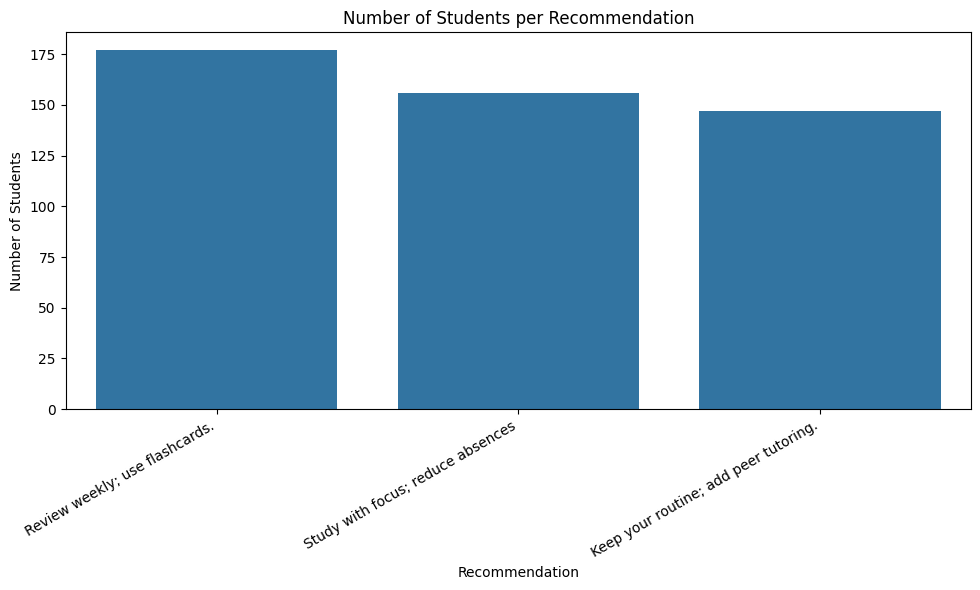

In [38]:
import os
os.makedirs("visualizations", exist_ok=True)

plt.figure(figsize=(10,6))  # Wider plot to fit long labels
sns.countplot(x=math['Recommendation'], order=math['Recommendation'].value_counts().index)
plt.title("Number of Students per Recommendation")
plt.xlabel("Recommendation")
plt.ylabel("Number of Students")
plt.xticks(rotation=30, ha='right')  # Rotate labels 30 degrees and align right
plt.tight_layout()
plt.savefig("visualizations/recommendation_countplot.png")
plt.show()


In [39]:
math.to_csv('/content/drive/MyDrive/Study_Based_Recommendation/student-mat_with_recommendations.csv', index=False)


In [40]:
print(math[['cluster', 'Recommendation', 'Tool_or_Technique']].value_counts())


cluster  Recommendation                         Tool_or_Technique             
2        Review weekly; use flashcards.         Flashcard apps, weekly planner    177
1        Study with focus; reduce absences      Online courses, calendar apps     156
0        Keep your routine; add peer tutoring.  Group study, Pomodoro apps        147
Name: count, dtype: int64
